In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
from scipy.stats import pearsonr

In [2]:
# Set global font size
plt.rcParams['font.size'] = 16

In [3]:

df = pd.read_csv("./user_study_2_data.csv")
df


,ID,a_or_b,age,gender,tinder_frequency,group_chat_frequency,self_initiated_lunch,sus_a,sus_b,gesture_count_a,gesture_count_b,time_a,time_b
0,MAC112,b,23,male,3,2,4,72.5,60.0,25,14,38,68
1,Ya26,a,21,female,2,2,3,95.0,87.5,13,9,26,20
2,jd5382,b,21,male,2,3,2,95.0,85.0,10,17,21,48
3,PP732512,a,21,male,5,4,2,95.0,65.0,13,6,14,10
4,D111N,a,23,male,2,3,4,92.5,92.5,13,12,18,34
5,Sa1010,b,27,female,2,4,2,95.0,77.5,21,16,31,64
6,G0S1A,b,23,female,2,3,2,92.5,92.5,13,6,52,42
7,B00B5,a,21,male,4,2,2,80.0,92.5,9,6,14,8
8,M0705A,a,22,female,3,3,2,90.0,77.5,13,8,15,17
9,M1109E,b,24,female,2,3,3,95.0,85.0,5,6,6,13


In [5]:
avg_age = df['age'].mean()
med_age = df['age'].median()
avg_age, med_age, df["age"].std()

(22.333333333333332, 21.5, 1.8257418583505536)

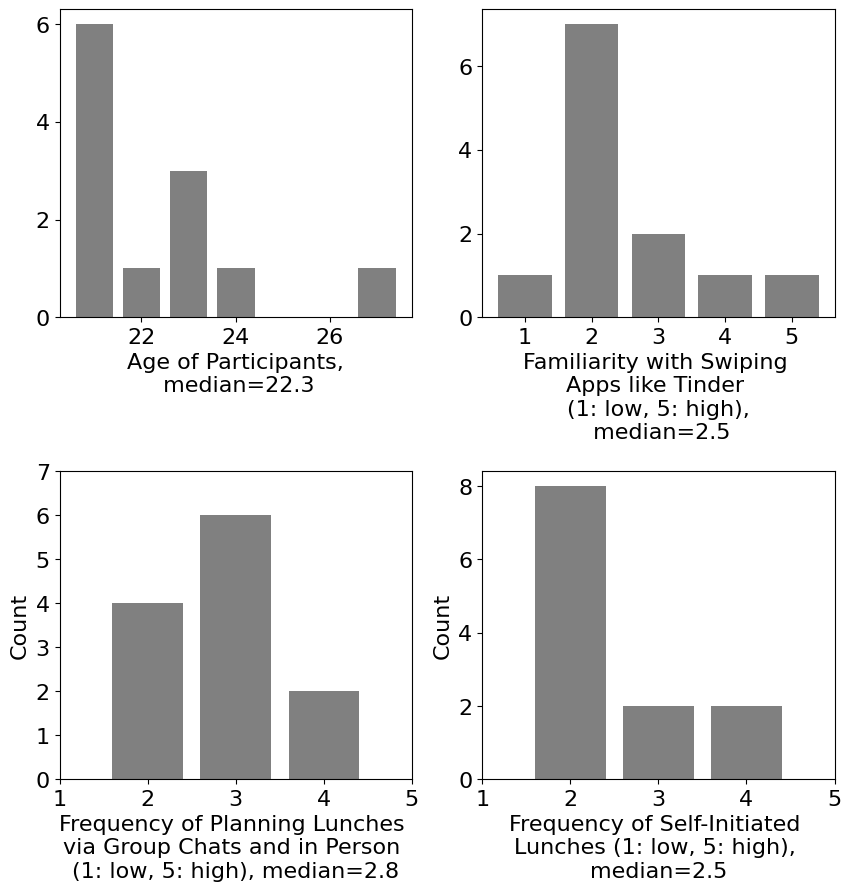

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Plot 1: Tinder Familiarity
avg_tinder_familiarity = df['age'].mean()
familiarity_counts = df['age'].value_counts().sort_index()
axs[0,0].bar(familiarity_counts.index, familiarity_counts, color='grey')
# axs[0,0].set_xticks(np.arange(1, 6, 1))
axs[0,0].set_xlabel(f'Age of Participants,\n median={avg_tinder_familiarity:.1f}')

# Plot 1: Tinder Familiarity
avg_tinder_familiarity = df['tinder_frequency'].mean()
familiarity_counts = df['tinder_frequency'].value_counts().sort_index()
axs[0, 1].bar(familiarity_counts.index, familiarity_counts, color='grey')
axs[0, 1].set_xticks(np.arange(1, 6, 1))
axs[0, 1].set_xlabel(f'Familiarity with Swiping \nApps like Tinder \n(1: low, 5: high),\n median={avg_tinder_familiarity:.1f}')


# Plot 2: Frequency of Planning Lunches
avg_planning_frequency = df['group_chat_frequency'].mean()
frequency_counts = df['group_chat_frequency'].value_counts().sort_index()
axs[1, 0].bar(frequency_counts.index, frequency_counts, color='grey')
axs[1, 0].set_xticks(np.arange(1, 6, 1))
axs[1, 0].set_yticks(np.arange(0, 8, 1))
axs[1, 0].set_xlabel(f'Frequency of Planning Lunches \nvia Group Chats and in Person \n(1: low, 5: high), median={avg_planning_frequency:.1f}')
axs[1, 0].set_ylabel('Count')



# Plot 3: Frequency of Self-Initiated Lunch
avg_self_init_frequency = df['self_initiated_lunch'].mean()
si_frequency_counts = df['self_initiated_lunch'].value_counts().sort_index()
axs[1, 1].bar(si_frequency_counts.index, si_frequency_counts, color='grey')
axs[1, 1].set_xticks(np.arange(1,6,1))
axs[1, 1].set_xlabel(f'Frequency of Self-Initiated \nLunches (1: low, 5: high), \nmedian={avg_self_init_frequency:.1f}')
axs[1, 1].set_ylabel('Count')

plt.savefig('demographics_plots.png', dpi=300, bbox_inches='tight')


In [13]:
# Do Shapiro-Wilke Test
shapiro_res_sus_a = shapiro(df['sus_a'])
shapiro_res_sus_b = shapiro(df['sus_b'])
print(f'Shapiro-Wilke Test for SUS A: {shapiro_res_sus_a}')
print(f'Shapiro-Wilke Test for SUS B: {shapiro_res_sus_b}')

Shapiro-Wilke Test for SUS A: ShapiroResult(statistic=0.7751504182815552, pvalue=0.004955803044140339)
Shapiro-Wilke Test for SUS B: ShapiroResult(statistic=0.830452561378479, pvalue=0.021236563101410866)


In [11]:
# Separate the data into the groups
group_a = df[df['a_or_b'] == 'a']
group_b = df[df['a_or_b'] == 'b']

# Perform Levene's test for 'sus_a'
levene_test_sus_a = levene(group_a['sus_a'], group_b['sus_a'])

# Perform Levene's test for 'sus_b'
levene_test_sus_b = levene(group_a['sus_b'], group_b['sus_b'])
levene_test_sus_both = levene(df['sus_a'],df['sus_b'])
print(f"Levene's test for SUS A: {levene_test_sus_a}")
print(f"Levene's test for SUS B: {levene_test_sus_b}")
print(f"Levene's test for SUS A and B: {levene_test_sus_both}")

Levene's test for SUS A: LeveneResult(statistic=0.04158004158004163, pvalue=0.8425123221061387)
Levene's test for SUS B: LeveneResult(statistic=0.023866348448687385, pvalue=0.880298940722505)
Levene's test for SUS A and B: LeveneResult(statistic=0.6757679180887372, pvalue=0.4198683936720312)


In [12]:
# Do Wilcoxon Signed Rank Test
wilcoxon_res_sus = wilcoxon(df['sus_a'], df['sus_b'])

print(f"Wilcoxon Signed Rank Test: {wilcoxon_res_sus}")

Wilcoxon Signed Rank Test: WilcoxonResult(statistic=13.0, pvalue=0.1358042875031563)


/Users/charelkremer/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [14]:
# Calculate useful metrics
avg_sus_value_a = df['sus_a'].mean()
avg_sus_value_b = df['sus_b'].mean()
std_sus_value_a = df['sus_a'].std()
std_sus_value_b = df['sus_b'].std()

mean_sus = [avg_sus_value_a, avg_sus_value_b]
stddev_sus = [std_sus_value_a, std_sus_value_b]

In [21]:

# Do Shapiro-Wilke Test
shapiro_res_time_a = shapiro(df['time_a'])
shapiro_res_time_b = shapiro(df['time_b'])
print(f'Shapiro-Wilke Test for Time A: {shapiro_res_time_a}')
print(f'Shapiro-Wilke Test for Time B: {shapiro_res_time_b}')


# Do Levene Test
# Separate the data into the groups
group_a = df[df['a_or_b'] == 'a']
group_b = df[df['a_or_b'] == 'b']

# Perform Levene's test for 'sus_a'
levene_test_time_a = levene(group_a['time_a'], group_b['time_a'])

# Perform Levene's test for 'sus_b'
levene_test_time_b = levene(group_a['time_b'], group_b['time_b'])

#perform levene test differently:
levene_test_time_both = levene(df['time_a'],df['time_b'])

print(f"Levene's test for Time A: {levene_test_time_a}")
print(f"Levene's test for Time B: {levene_test_time_b}")
print(f"Levene's test for Time A and B: {levene_test_time_both}")


# Do paired t-test
paired_ttest_time = ttest_rel(df['time_a'], df['time_b'])
print(f"Paired t-test for Time: {paired_ttest_time}")


# Calculate useful metrics
avg_time_value_a = df['time_a'].mean()
avg_time_value_b = df['time_b'].mean()
std_time_value_a = df['time_a'].std()
std_time_value_b = df['time_b'].std()

mean_times = [avg_time_value_a, avg_time_value_b]
stddev_time = [std_time_value_a, std_time_value_b]

Shapiro-Wilke Test for Time A: ShapiroResult(statistic=0.8957516551017761, pvalue=0.1398007720708847)
Shapiro-Wilke Test for Time B: ShapiroResult(statistic=0.8907754421234131, pvalue=0.12058423459529877)
Levene's test for Time A: LeveneResult(statistic=7.662835249042145, pvalue=0.019849104849302992)
Levene's test for Time B: LeveneResult(statistic=2.7066872229716714, pvalue=0.13095311717042218)
Levene's test for Time A and B: LeveneResult(statistic=3.4366453093621496, pvalue=0.07722248575221756)
Paired t-test for Time: Ttest_relResult(statistic=-1.754798925939074, pvalue=0.10706821349315927)


In [15]:
# Do Shapiro-Wilke Test
shapiro_res_gesture_count_a = shapiro(df['gesture_count_a'])
shapiro_res_gesture_count_b = shapiro(df['gesture_count_b'])
print(f'Shapiro-Wilke Test for Gesture Count A: {shapiro_res_gesture_count_a}')
print(f'Shapiro-Wilke Test for Gesture Count B: {shapiro_res_gesture_count_b}')


# Do Levene Test
# Separate the data into the groups
group_a = df[df['a_or_b'] == 'a']
group_b = df[df['a_or_b'] == 'b']

# Perform Levene's test for 'sus_a'
levene_test_gesture_count_a = levene(group_a['gesture_count_a'], group_b['gesture_count_a'])

# Perform Levene's test for 'sus_b'
levene_test_gesture_count_b = levene(group_a['gesture_count_b'], group_b['gesture_count_b'])

# Perform levene test differently:
levene_test_gesture_count_both = levene(df['gesture_count_a'],df['gesture_count_b'])

print(f"Levene's test for Gesture Count A: {levene_test_gesture_count_a}")
print(f"Levene's test for Gesture Count B: {levene_test_gesture_count_b}")
print(f"Levene's test for Gesture Count A and B: {levene_test_gesture_count_both}")


# Do paired t-test
ttest_res_gesture_count = ttest_rel(df['gesture_count_a'], df['gesture_count_b'])
print(f"Paired t-test for Gesture Count: {ttest_res_gesture_count}")


# Calculate useful metrics
avg_gesture_count_value_a = df['gesture_count_a'].mean()
avg_gesture_count_value_b = df['gesture_count_b'].mean()
std_gesture_count_value_a = df['gesture_count_a'].std()
std_gesture_count_value_b = df['gesture_count_b'].std()

mean_gesture_counts = [avg_gesture_count_value_a, avg_gesture_count_value_b]
stddev_gesture_counts = [std_gesture_count_value_a, std_gesture_count_value_b]

Shapiro-Wilke Test for Gesture Count A: ShapiroResult(statistic=0.9254027605056763, pvalue=0.333916574716568)
Shapiro-Wilke Test for Gesture Count B: ShapiroResult(statistic=0.8264025449752808, pvalue=0.019000237807631493)
Levene's test for Gesture Count A: LeveneResult(statistic=4.142045454545455, pvalue=0.06920036410653216)
Levene's test for Gesture Count B: LeveneResult(statistic=13.136363636363637, pvalue=0.004655486184114122)
Levene's test for Gesture Count A and B: LeveneResult(statistic=0.32069970845481033, pvalue=0.5769193750919581)
Paired t-test for Gesture Count: Ttest_relResult(statistic=2.486734197960675, pvalue=0.030210183681158305)


[]

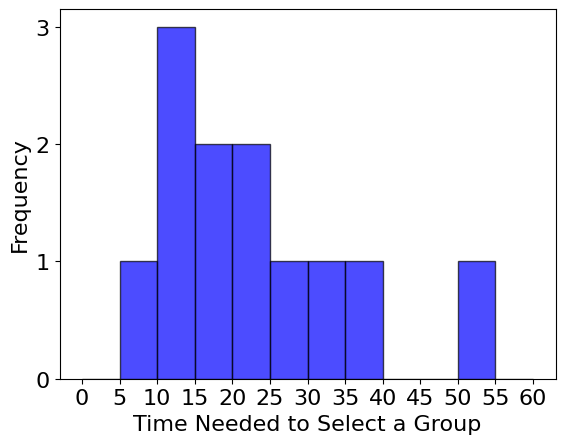

In [18]:

##### 2. Dependent variable: Time needed to select a group

number_of_bins = 12

# A
plt.hist(df['time_a'], range=(0,60), bins=number_of_bins, color='blue', edgecolor='black', alpha=0.7)
plt.xticks(np.arange(0,61,5))
plt.yticks(np.arange(0, 5, 1)) 
plt.xlabel('Time Needed to Select a Group')
plt.ylabel('Frequency')
#plt.title(f'Histogram of Time Needed to Select a Group in A Test')

plt.savefig('histogram_time_A.png', dpi=300, bbox_inches='tight')
plt.plot()




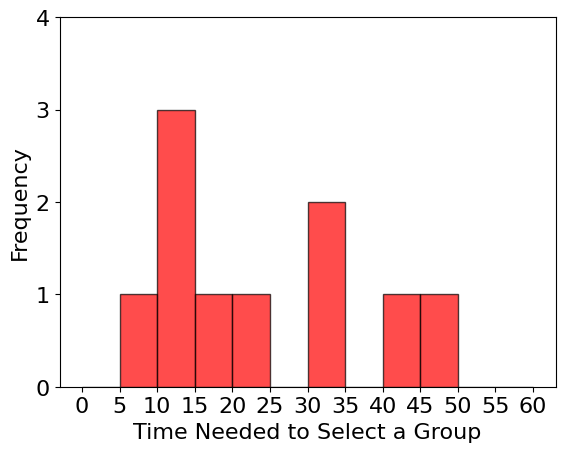

In [19]:

# B
plt.hist(df['time_b'], range=(0,60), bins=number_of_bins, color='red', edgecolor='black', alpha=0.7)
plt.xticks(np.arange(0,61,5))
plt.yticks(np.arange(0, 5, 1)) 
plt.xlabel('Time Needed to Select a Group')
plt.ylabel('Frequency')
#plt.title(f'Histogram of Time Needed to Select a Group in B Test')
plt.savefig('histogram_time_B.png', dpi=300, bbox_inches='tight')